# Facial emotion recognition
The aim of this lab (TP) is to is to recognize facial emotions from a video using deep learning
approach. The system can take pictures or video form webcam as input. It detects all faces in
each frame, and then classifies the emotions as belonging to one of the 7 emotion categories:
Angry, Disgusted, Neutral, Sad, Happy, Surprised and Fear.
Facial landmarks are used to localize and represent salient regions of the face, such as: eyes,
eyebrows nose, mouth jawline. They have been successfully applied to face alignment, head
pose estimation, face swapping, blink detection and much more.

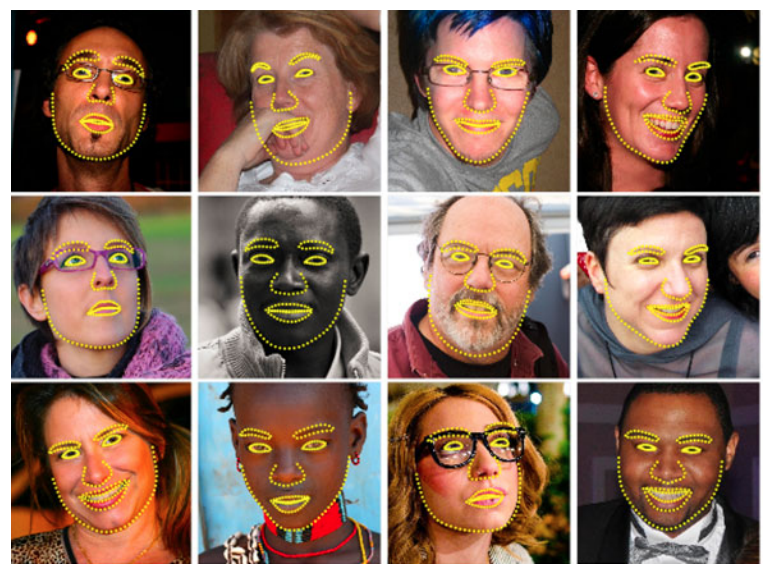

We propose here to develop an approach based on famous facial landmarks (68 facial landmarks can be detected with dlib library), which and use the Eucledian distance between them as 68x68 array and use them as feature to learn a network

In [ ]:
import math

def euclidean(a, b):
    dist = math.sqrt(math.pow((b[0] - a[0]), 2) + math.pow((b[1] - a[1]), 2))
    return dist 

def euclidean_all(a):  # calculates distances between all 68 elements
	distances = ""
	for i in range(0, len(a)):
		for j in range(0, len(a)):
			dist = euclidean(a[i], a[j])
			dist = "%.2f" % dist;
			distances = distances + " " + str(dist)
	return distances


Propose a neuron network composed only of a few layers of full connected layers like this architecture:
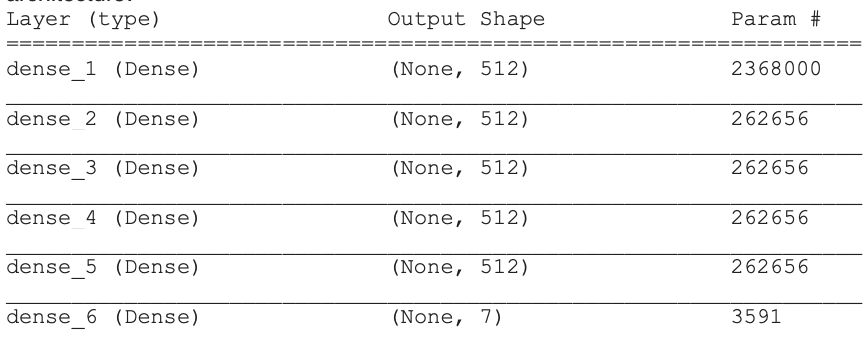

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from zipfile import ZipFile
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras import models,optimizers,layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard
from scipy import stats
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
path = "/content/drive/MyDrive/Data/Ressources/"
file_name_facelanmarks = path + "train_test_faceImages.zip"
file_name_landmarks = path + "train_test_landmarks.zip"

with ZipFile(file_name_facelanmarks, 'r') as zip:
  zip.extractall()
  print('Done')

with ZipFile(file_name_landmarks, 'r') as zip:
  zip.extractall()
  print('Done')

Done
Done


# Model Landmarks

In [ ]:
X_train = np.load('x_train.npy')
X_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [ ]:
model = models.Sequential() # (1)
model.add(layers.Dense(512, activation='relu',input_shape=(4624,)))
for i in range(4):
  model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax')) 
model.summary()
# model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.01), metrics=['acc'])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 512)               2368000   
                                                                 
 dense_78 (Dense)            (None, 512)               262656    
                                                                 
 dense_79 (Dense)            (None, 512)               262656    
                                                                 
 dense_80 (Dense)            (None, 512)               262656    
                                                                 
 dense_81 (Dense)            (None, 512)               262656    
                                                                 
 dense_82 (Dense)            (None, 7)                 3591      
                                                                 
Total params: 3,422,215
Trainable params: 3,422,215
N

1/1 [==============================] - 0s 18ms/step


array([[5.2489581e-06, 3.2983669e-09, 2.6249484e-06, 4.5534726e-08,
        9.9951017e-01, 4.8202073e-04, 2.2583744e-09]], dtype=float32)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0001), metrics=['acc'])

NAME = "Niaussat_Dense"
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [ ]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),batch_size=20,callbacks=[tensorboard])

Epoch 1/30
38/38 [==============================] - 2s 44ms/step - loss: 0.1610 - acc: 0.9501 - val_loss: 0.5856 - val_acc: 0.8329
Epoch 2/30
38/38 [==============================] - 1s 31ms/step - loss: 0.1440 - acc: 0.9528 - val_loss: 0.6092 - val_acc: 0.8219
Epoch 3/30
38/38 [==============================] - 1s 31ms/step - loss: 0.1361 - acc: 0.9609 - val_loss: 0.5381 - val_acc: 0.8630
Epoch 4/30
38/38 [==============================] - 1s 31ms/step - loss: 0.1517 - acc: 0.9528 - val_loss: 0.7016 - val_acc: 0.8110
Epoch 5/30
38/38 [==============================] - 1s 31ms/step - loss: 0.1374 - acc: 0.9541 - val_loss: 0.7730 - val_acc: 0.7507
Epoch 6/30
38/38 [==============================] - 1s 31ms/step - loss: 0.1320 - acc: 0.9595 - val_loss: 0.7094 - val_acc: 0.7918
Epoch 7/30
38/38 [==============================] - 1s 31ms/step - loss: 0.2475 - acc: 0.9298 - val_loss: 0.7590 - val_acc: 0.7644
Epoch 8/30
38/38 [==============================] - 1s 36ms/step - loss: 0.3094 - a

In [ ]:
model.save("recognition.h5")

To train this network, you can use the dataset (train_test_landmarks.zip extracted from a
mixture of CK+ and JAFFE datasets) already prepared as feature vector of distances with the
format:(741, 4624) for train and (365, 4624) for test. After the training, save you best model.
https://drive.google.com/file/d/1teun1oa2nolShwfpksV-nOdeWCX484ax/view?usp=sharing


To prepare your files for training and 

Now, in order to use the vector of these distances to classify emotions from 
an image, you detect the face region, extract the facial landmarks and then compute the 4624 distances between them.

The following script allow to capture the face region using Haar detector
(haarcascade_frontalface_default.xml) and detect 68 facial landmarks using the learned model (shape_predictor_68_face_landmarks.dat):

In [ ]:
import numpy as np
import cv2
from imutils import face_utils
import imutils
import dlib
# -----------


face_cascade = cv2.CascadeClassifier(path + '/haarcascade_frontalface_default.xml')
# initialize dlib's face detector and create a predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(path + "/shape_predictor_68_face_landmarks.dat")

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread(path+"example_image1.jpg")
def detect_parts(image):
    # resize the image, and convert it to grayscale
    image = imutils.resize(image, width=200, height=200)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # detect faces in the grayscale image
    rects = detector(gray, 1)
    
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
     
    return np.asarray(euclidean_all(shape)[1:].split(" "),dtype=float)

In [ ]:
len(detect_parts(img))

4624

1/1 [==============================] - 0s 19ms/step


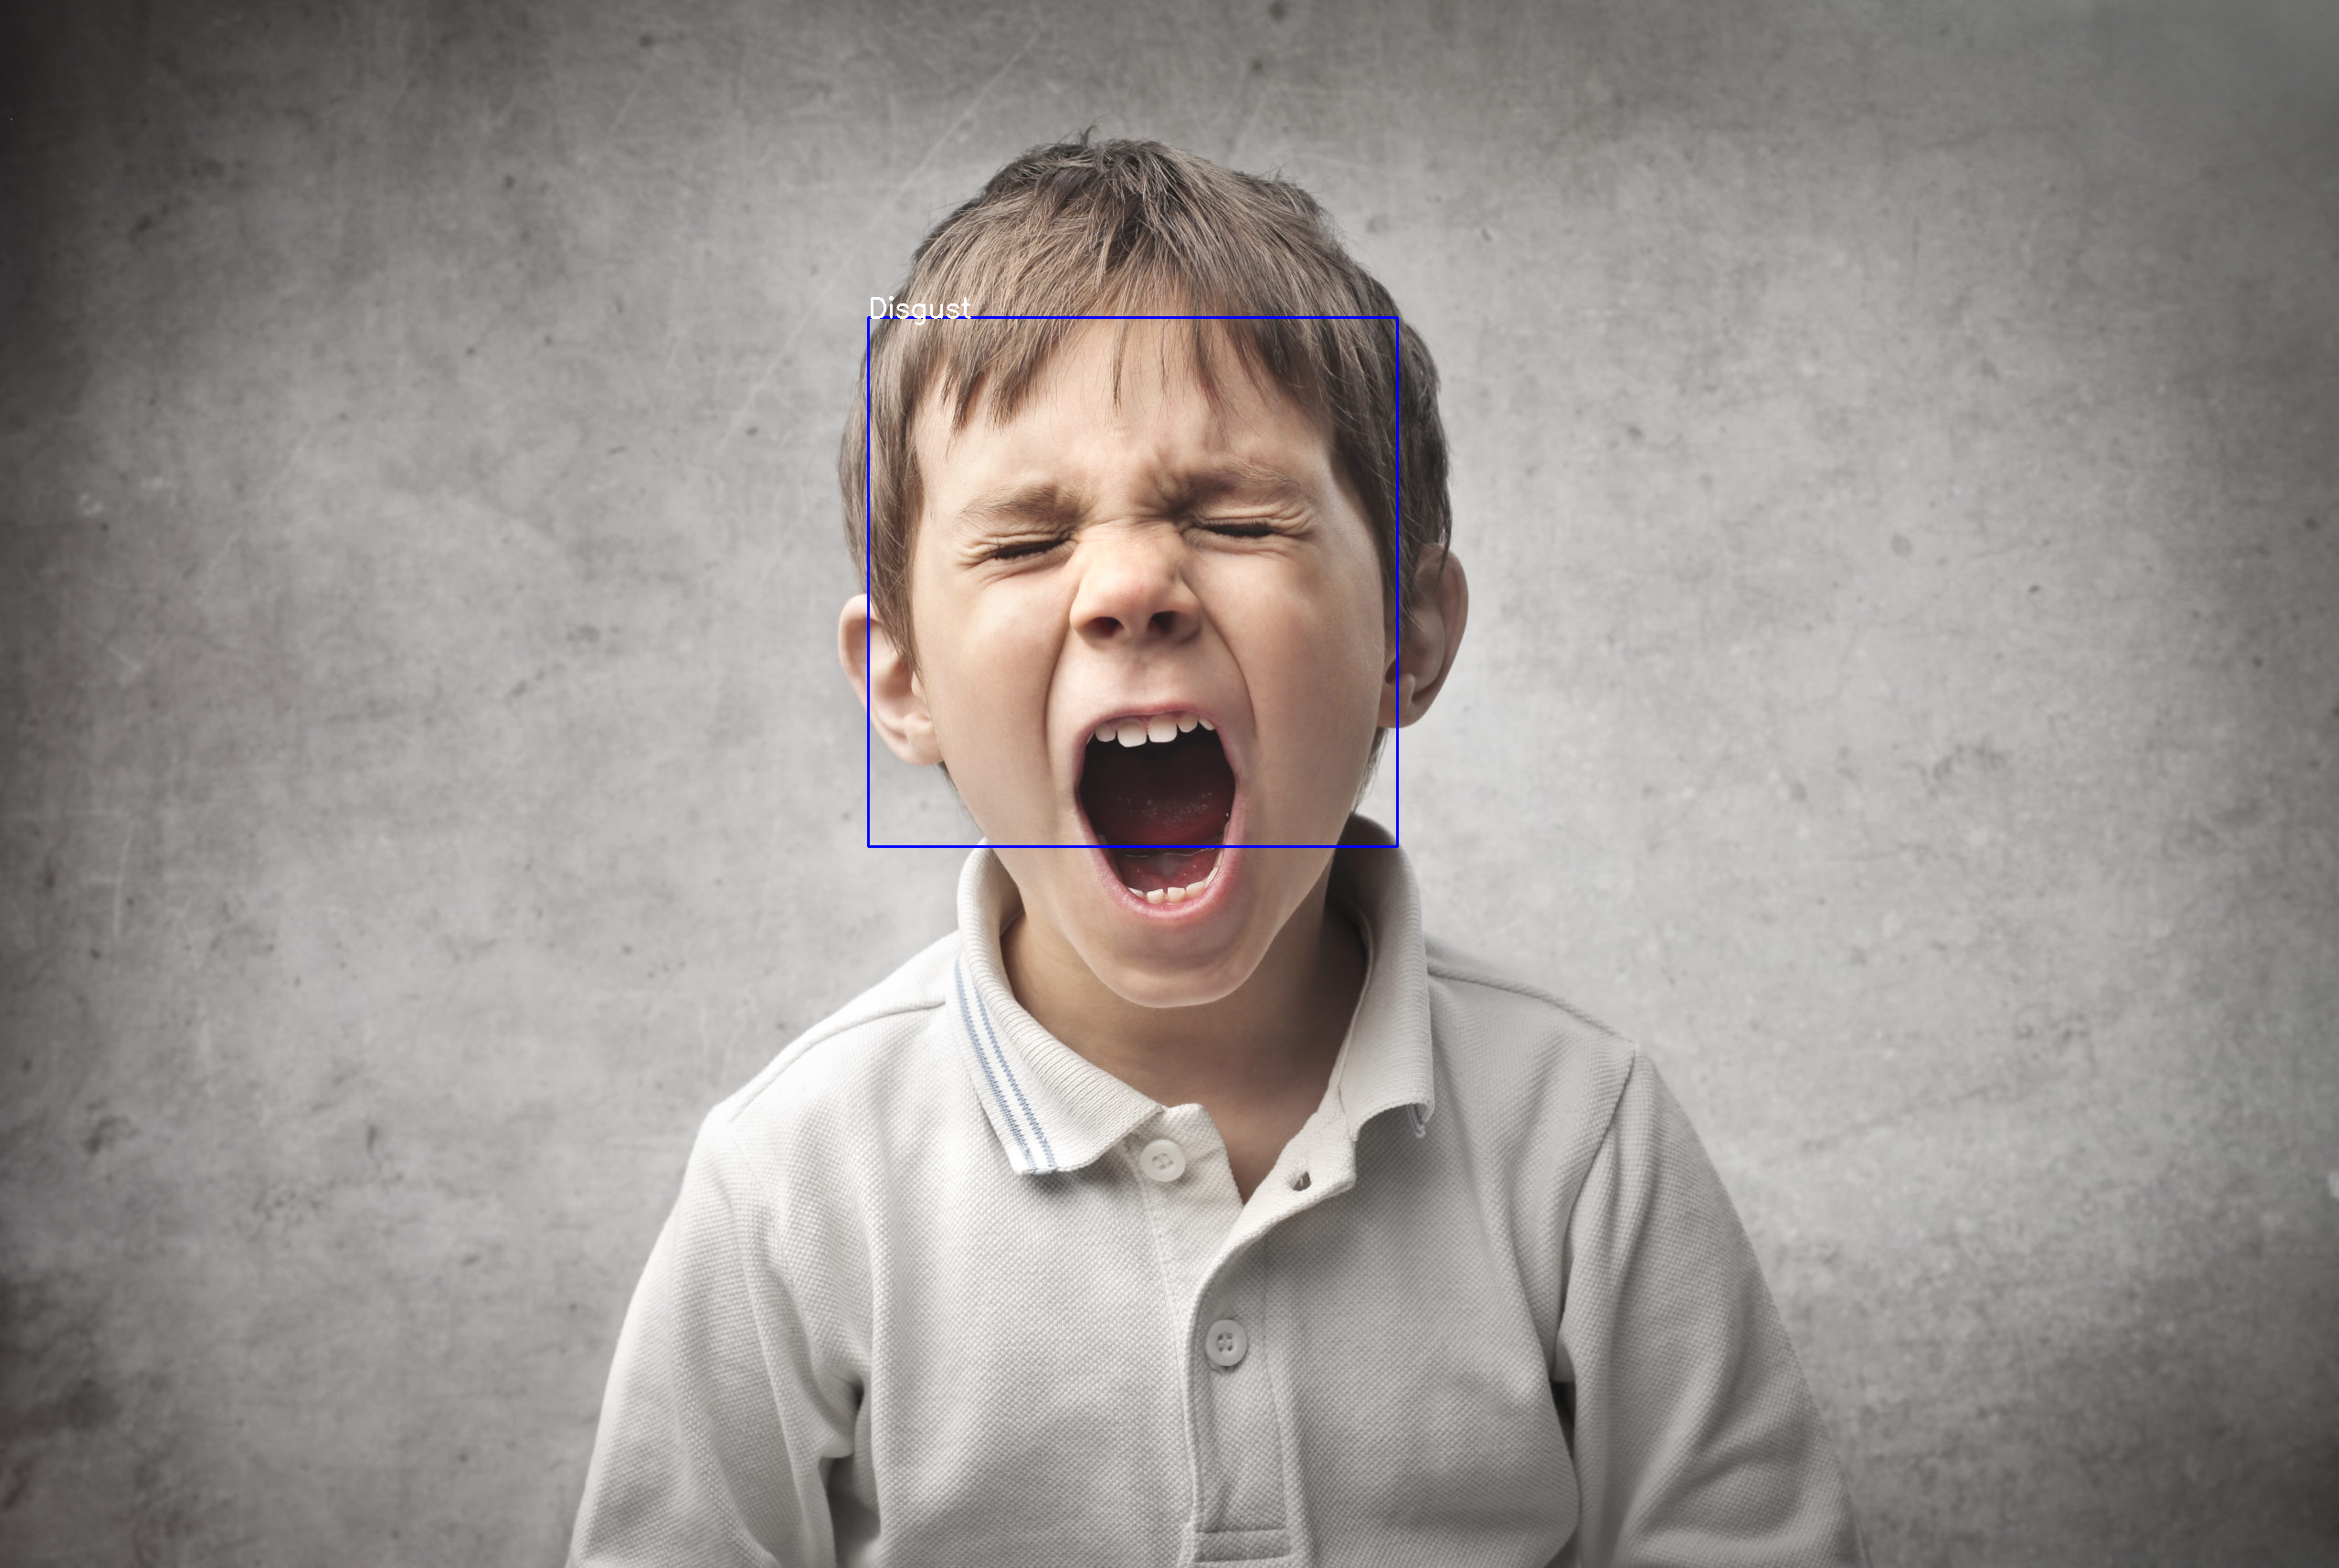

-1

In [ ]:
img = cv2.imread(path+"enfant-enerve.jpeg")
from google.colab.patches import cv2_imshow
def print_rect_faces(img):
  
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  emotions = ('Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise')
  for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # draw rectangle to main image
      detected_face = img[int(y):int(y + h), int(x):int(x + w)]  # crop detected face
      distances = detect_parts(detected_face)
      predictions = emotions[np.argmax(model.predict(np.array([distances])))]
      cv2.putText(img, predictions, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
  return(img)
cv2_imshow(print_rect_faces(img))
cv2.waitKey(0)


To classify emotions in real time capture, you need first to capture your video streaming from a webcam:

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print("bonjour")
  print('Saved to {}'.format(filename))
  img = Image(filename)
  cv2.putText(img, "oui", (int(4), int(200)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
  # Show the image which was just taken.
  
  display(img)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

'NoneType' object has no attribute 'split'


In [ ]:
X_train = np.load('images_train.npy')
X_test = np.load('images_test.npy')
y_train = np.load('labels_train.npy')
y_test = np.load('labels_test.npy')

In [ ]:
print(np.shape(X_test))

(2151, 48, 48, 1)


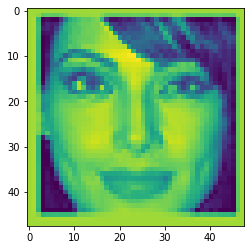

In [ ]:
plt.imshow(X_test[4].T[0].T)

**Question 1**: Develop your emotion recognition system to perform the recognition in real time.


**Question 2**: Propose another model based on a CNN extracted directly from the frame images.
To do this, uses the subsets (train_test_faceImages.zip extracted from FER2013 dataset.